In [4]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 📥 Load the Dataset
df = pd.read_csv(r"C:\Users\Rohit\Documents\Rohit\Internship\Elevate Labs\Task 5\train dataset.csv")  # Ensure this CSV is in your working directory


In [8]:
# BASIC OVERVIEW

print("Shape:", df.shape)
print("\nColumn Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique Values:\n", df.nunique())
print("\nDescriptive Stats:\n", df.describe(include='all'))

Shape: (891, 12)

Column Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Unique Values:
 PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Descriptive Stats:
         PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                  

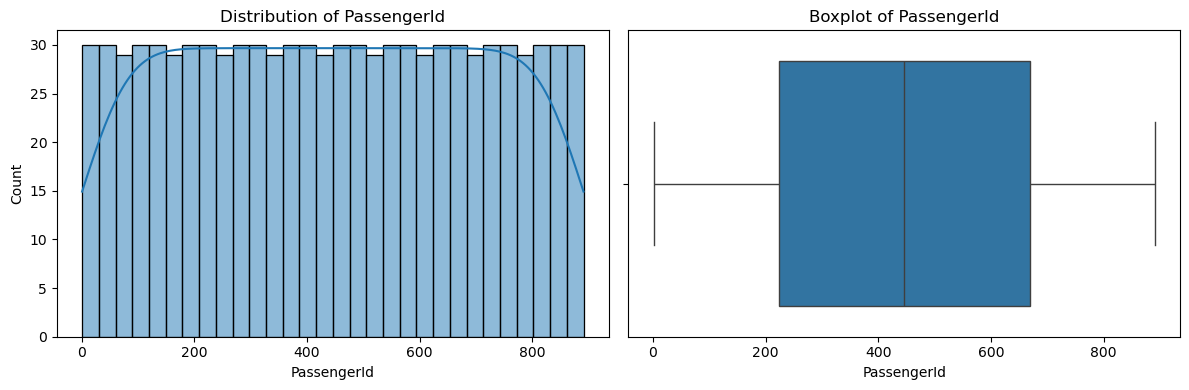

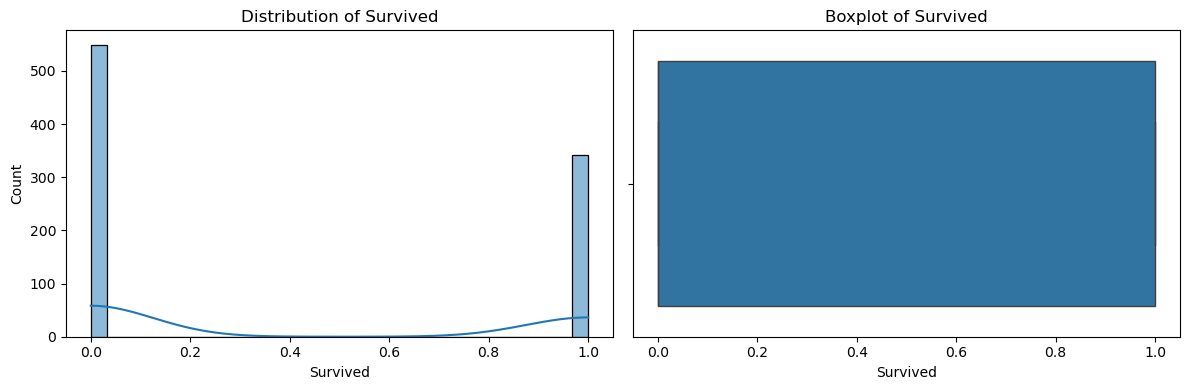

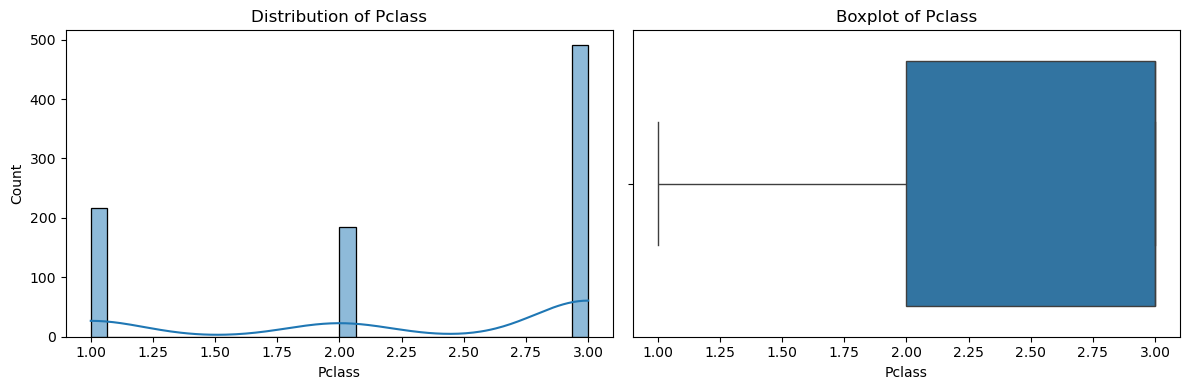

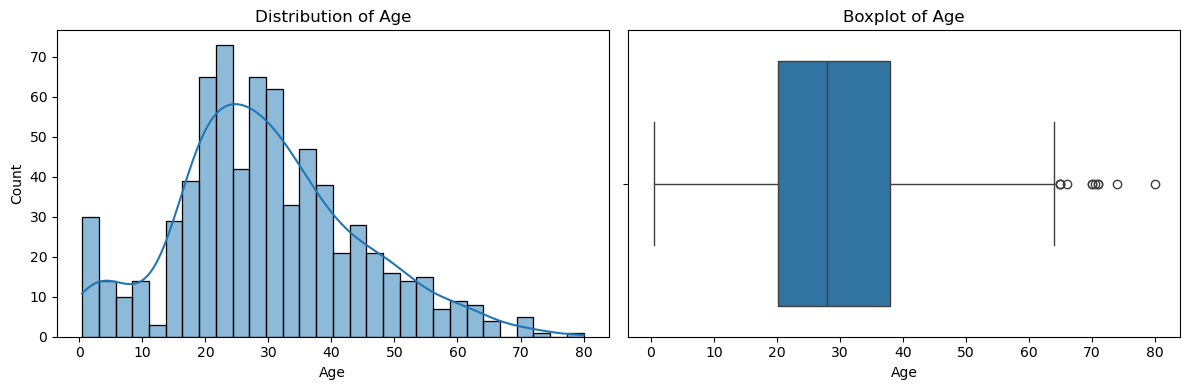

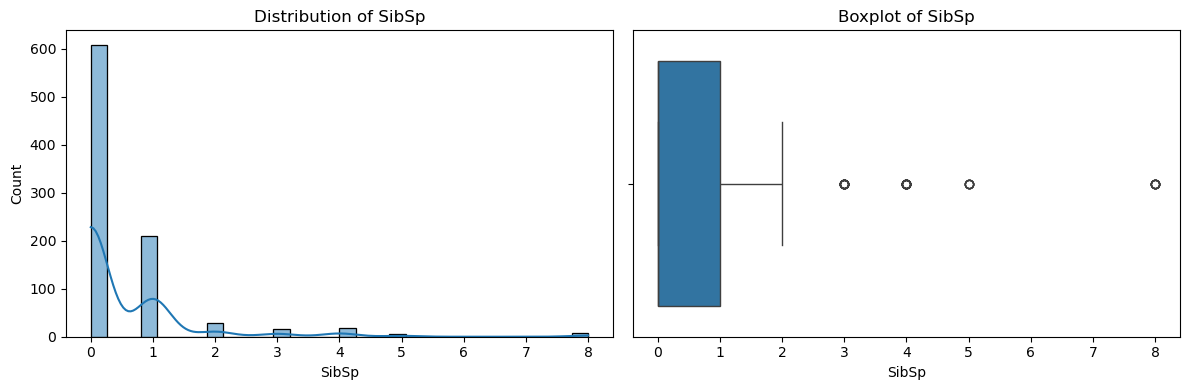

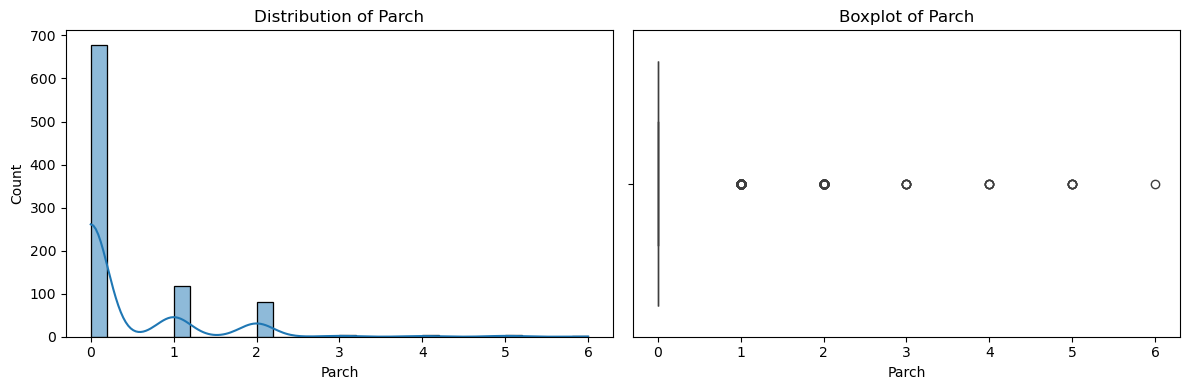

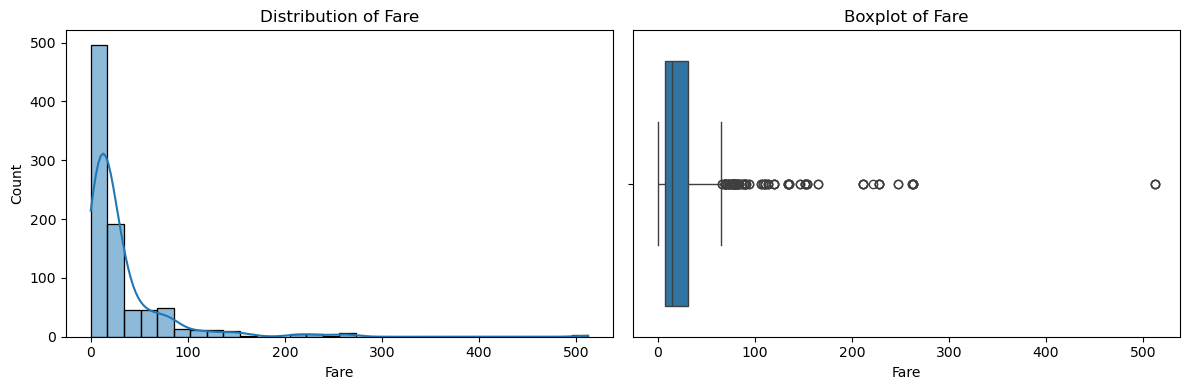

C:\Users\Rohit\AppData\Local\Temp\ipykernel_6244\2807690441.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


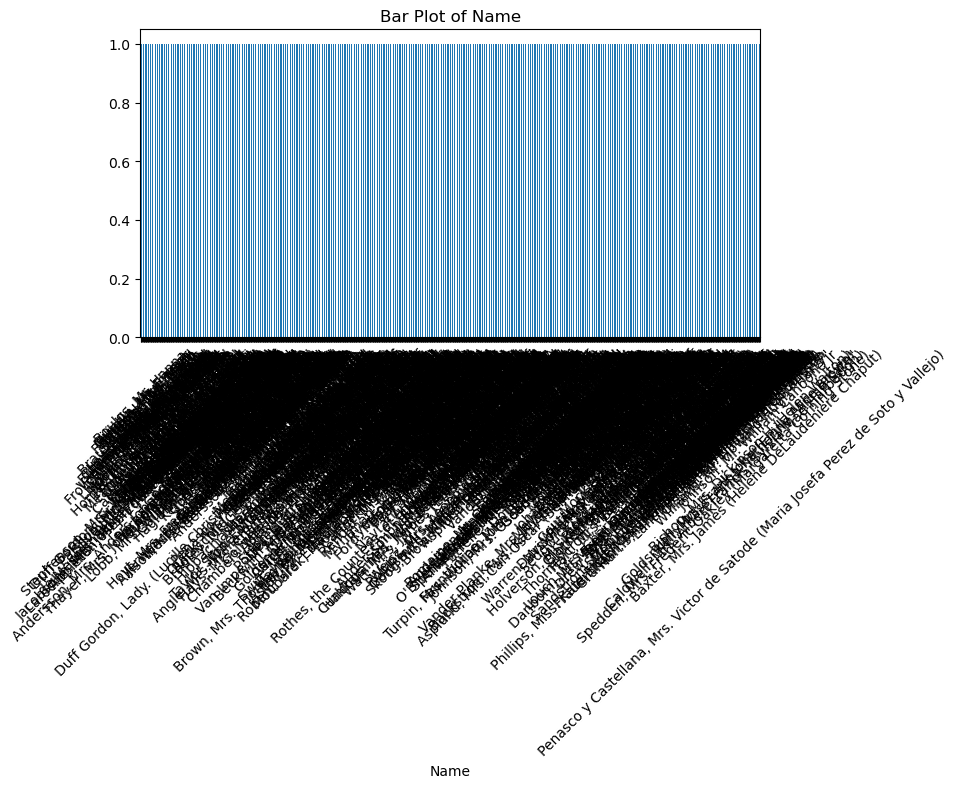

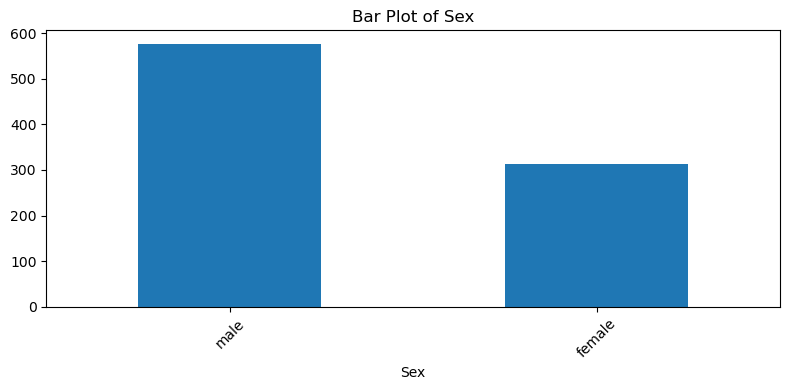

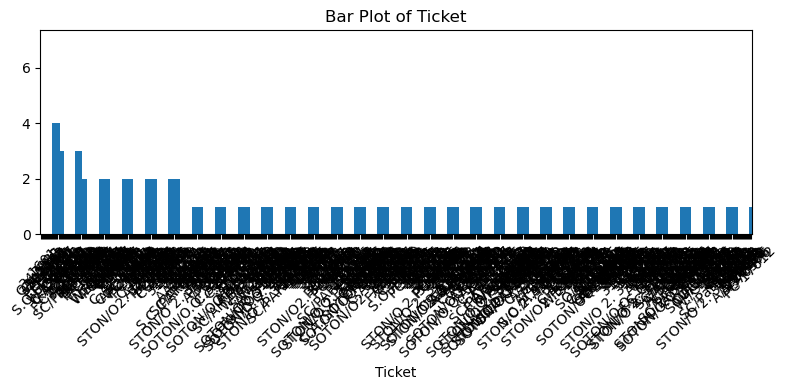

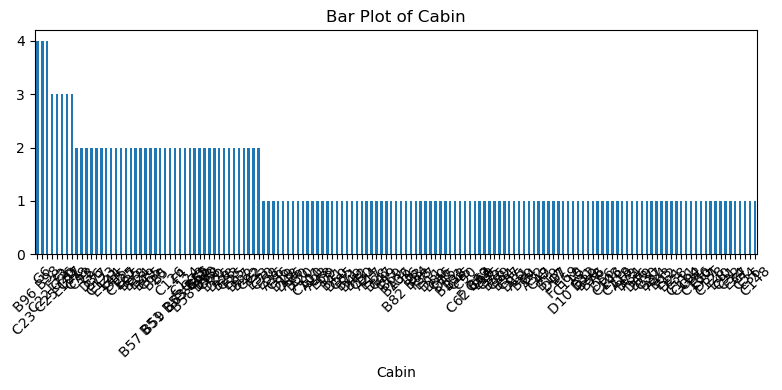

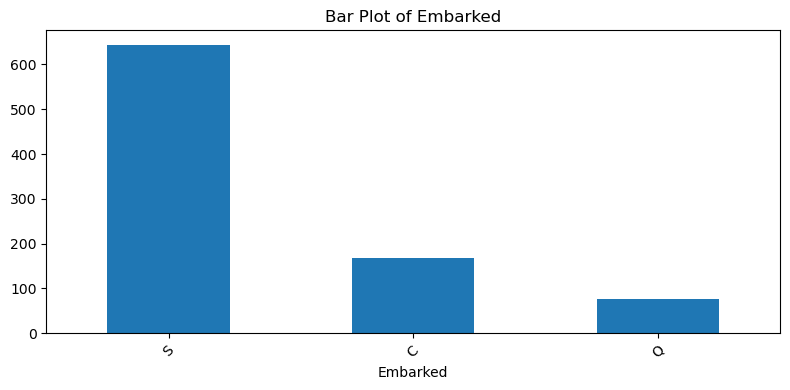

In [18]:
# UNIVARIATE ANALYSIS

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include='object').columns

# Plot numeric columns
for col in numeric_cols:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

# Plot categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Bar Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


C:\Users\Rohit\AppData\Local\Temp\ipykernel_6244\1676552089.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


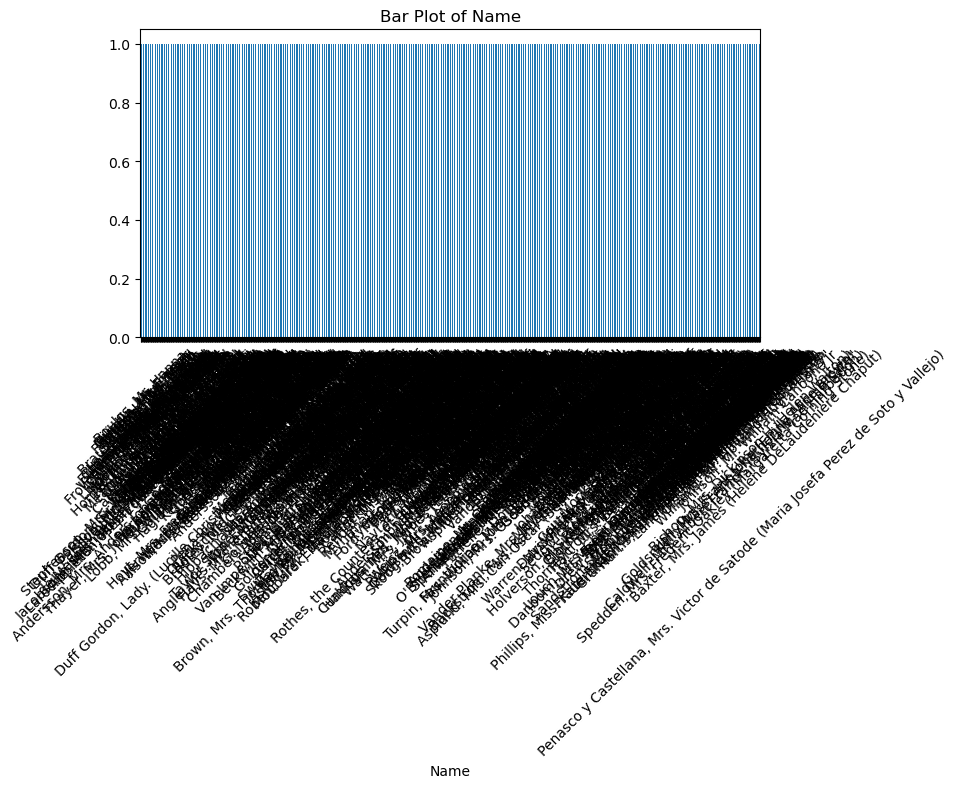

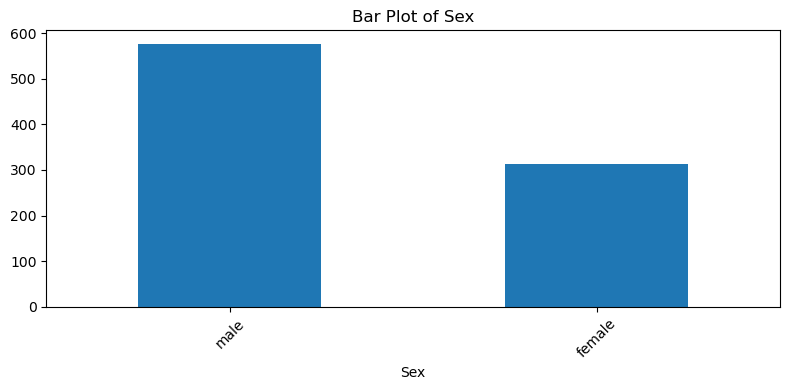

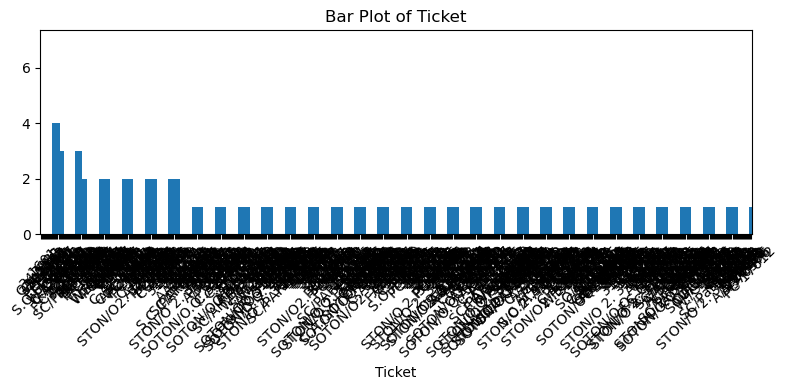

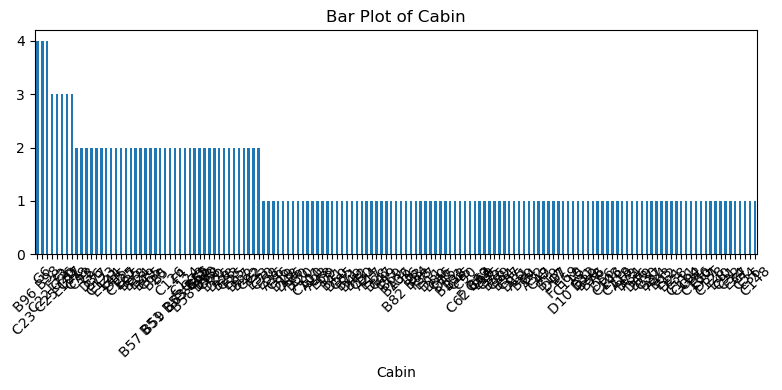

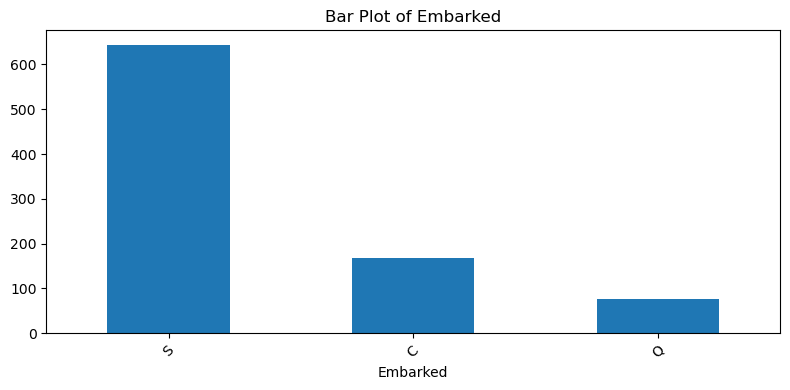

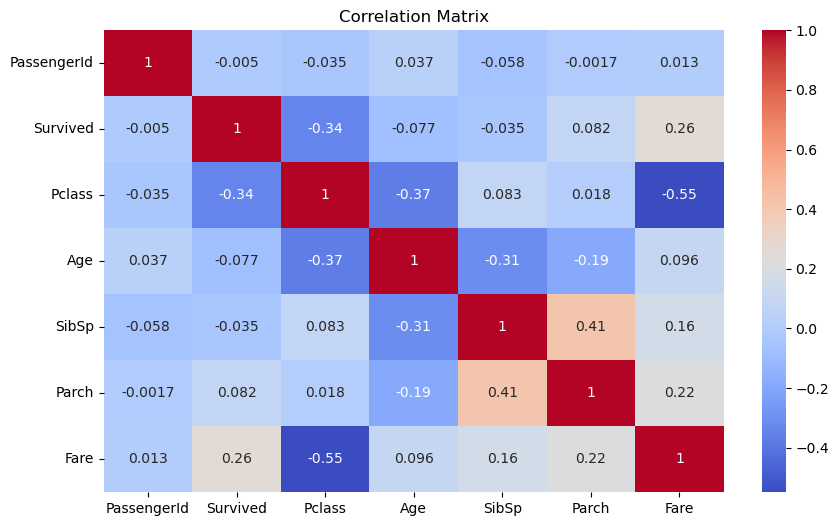

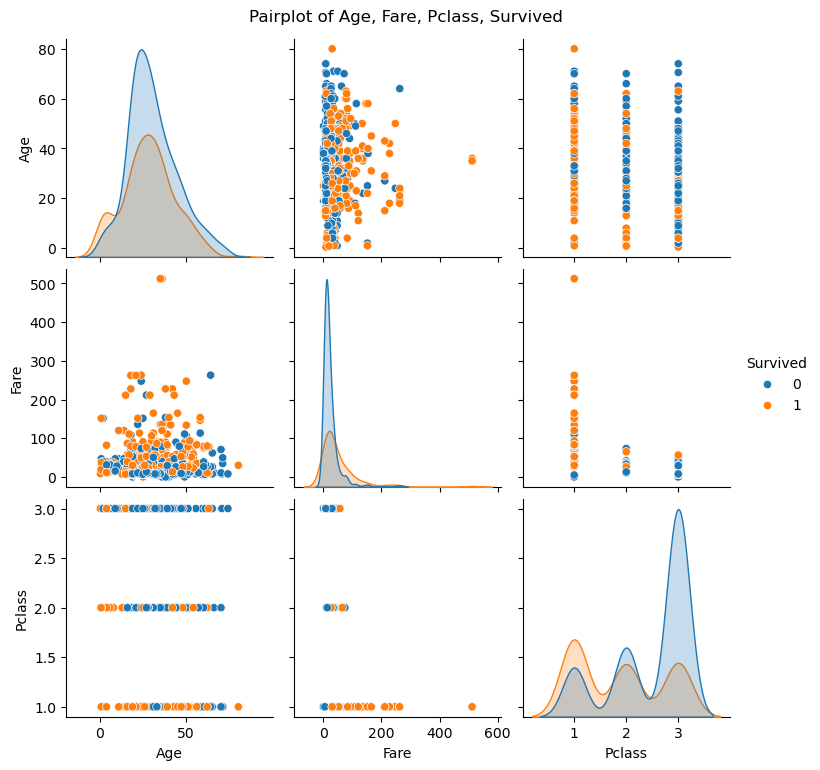

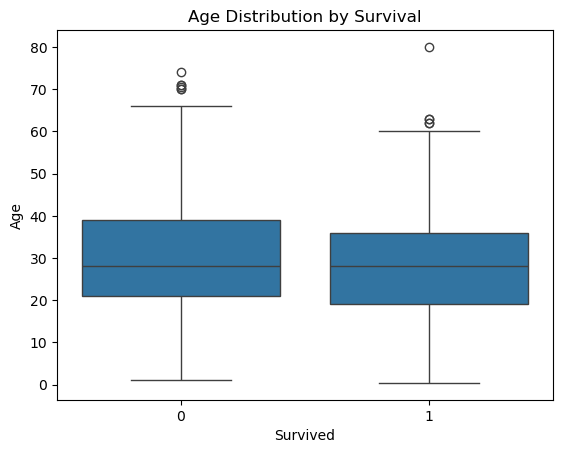

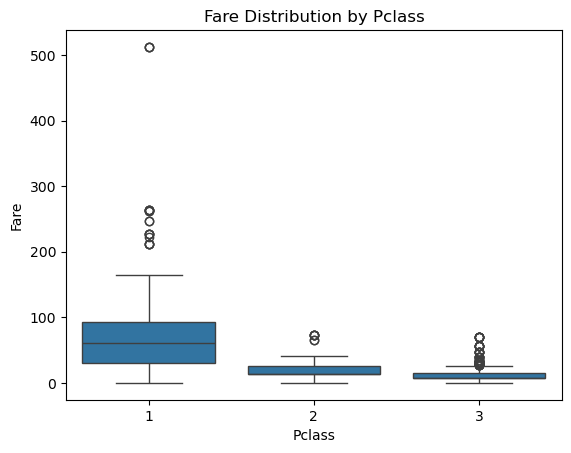

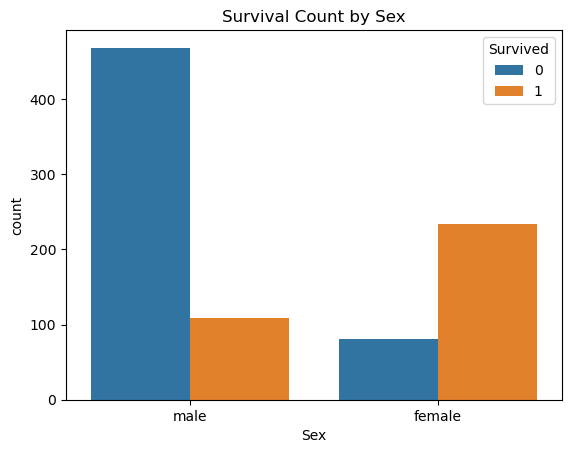

In [19]:
# BIVARIATE / MULTIVARIATE ANALYSIS
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Clean and prepare pairplot data
pairplot_data = df[['Age', 'Fare', 'Pclass', 'Survived']].copy()
for col in pairplot_data.columns:
    pairplot_data[col] = pd.to_numeric(pairplot_data[col], errors='coerce')
pairplot_data.dropna(inplace=True)

# Pairplot
sns.pairplot(pairplot_data, hue='Survived')
plt.suptitle("Pairplot of Age, Fare, Pclass, Survived", y=1.02)
plt.show()

# Boxplot: Age by Survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()

# Boxplot: Fare by Pclass
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare Distribution by Pclass")
plt.show()

# Countplot: Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Sex")
plt.show()


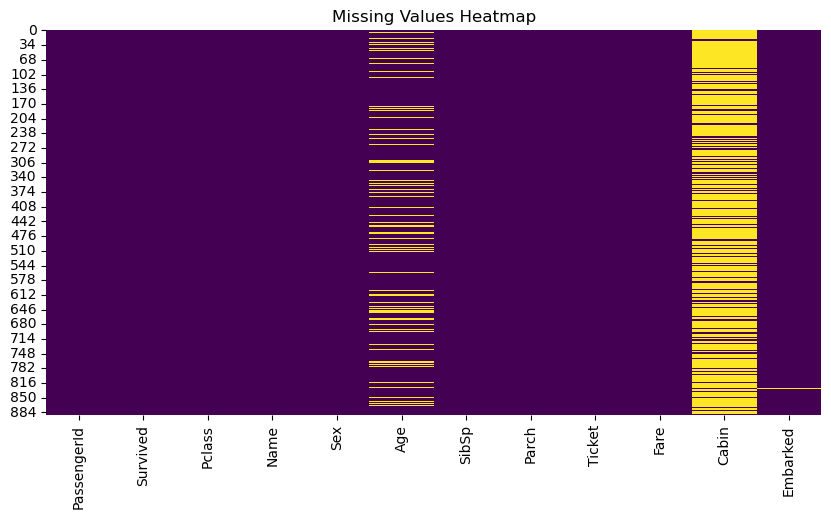

In [22]:
# MISSING VALUES VISUALIZATION

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()